epoch 0: [time: 2018.4144973754883 ms]
[D loss: 0.6898706555366516 | acc: 35.15625] [G loss: 0.6924700140953064]
real


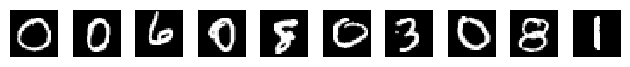

generated


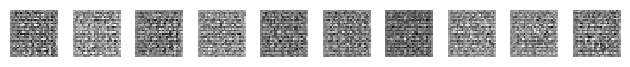

epoch 5: [time: 258.8610649108887 ms]
epoch 10: [time: 253.75938415527344 ms]
epoch 15: [time: 255.23805618286133 ms]
epoch 20: [time: 255.8600902557373 ms]
epoch 25: [time: 264.5680904388428 ms]
epoch 30: [time: 267.95411109924316 ms]
epoch 35: [time: 255.7697296142578 ms]
epoch 40: [time: 281.50343894958496 ms]
epoch 45: [time: 273.6635208129883 ms]
epoch 50: [time: 258.73589515686035 ms]
epoch 55: [time: 278.43427658081055 ms]
epoch 60: [time: 268.1891918182373 ms]
epoch 65: [time: 260.96463203430176 ms]
epoch 70: [time: 256.03771209716797 ms]
epoch 75: [time: 256.95204734802246 ms]
epoch 80: [time: 268.8791751861572 ms]
epoch 85: [time: 271.1007595062256 ms]
epoch 90: [time: 271.14081382751465 ms]
epoch 95: [time: 263.3945941925049 ms]
epoch 100: [time: 285.36319732666016 ms]
[D loss: 0.2921908460557461 | acc: 89.84375] [G loss: 1.350116491317749]
real


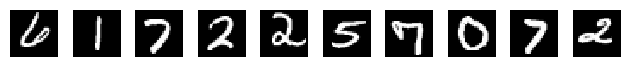

generated


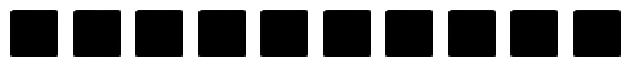

epoch 105: [time: 274.24073219299316 ms]
epoch 110: [time: 254.67848777770996 ms]
epoch 115: [time: 271.6853618621826 ms]
epoch 120: [time: 455.2183151245117 ms]
epoch 125: [time: 262.1431350708008 ms]
epoch 130: [time: 272.3879814147949 ms]
epoch 135: [time: 271.47388458251953 ms]
epoch 140: [time: 264.1921043395996 ms]
epoch 145: [time: 270.2622413635254 ms]
epoch 150: [time: 275.70343017578125 ms]
epoch 155: [time: 423.7697124481201 ms]
epoch 160: [time: 270.98751068115234 ms]
epoch 165: [time: 269.6974277496338 ms]
epoch 170: [time: 278.17606925964355 ms]
epoch 175: [time: 251.62172317504883 ms]
epoch 180: [time: 269.55533027648926 ms]
epoch 185: [time: 264.1263008117676 ms]
epoch 190: [time: 412.1243953704834 ms]
epoch 195: [time: 263.0281448364258 ms]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2DTranspose, Conv2D, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import time
import math

def makeGenerator():
    return Sequential([
        Dense(7 * 7 * 256, input_dim=100),
        LeakyReLU(alpha=0.2),
        Reshape((7, 7, 256)),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(1, kernel_size=4, strides=1, padding="same", activation="tanh")
    ])


def makeDiscriminator():
    return Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=(28, 28, 1)),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Conv2D(128, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation="sigmoid")
    ])

def generate_digits(generator, num=10):
    noise = np.random.normal(0, 1, (num, 100))
    return generator.predict(noise, verbose=0)

def plot(images, cols=10):
    images = np.array(images)
    images = np.squeeze(images)  # Remove single channel dimension if present

    num_images = len(images)

    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols) 
    axes = np.array(axes)
    for i in range(rows * cols):
        ax = axes.flat[i]  # Flatten axes for easy access
        if i < num_images:
            ax.imshow(images[i], cmap="gray", interpolation="nearest")
        ax.axis("off")  # Hide axis ticks

    plt.tight_layout()  # Prevent overlapping
    plt.show()

class GAN:
    def __init__(self, generator, discriminator):
        self.generator = generator
        self.discriminator = discriminator
        gan = Sequential([generator, discriminator])
        gan.compile(loss="binary_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
        self.gan = gan

    def train(self, X_train, epochs=10000, batch_size=128, latent_dim=100):
        half_batch = batch_size // 2

        for epoch in range(epochs):
            t1 = time.time()

            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            real_imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, latent_dim))
            
            fake_imgs = self.generator.predict(noise, verbose=0)

            real_labels = np.ones((half_batch, 1))
            fake_labels = np.zeros((half_batch, 1))

            self.discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            misleading_labels = np.ones((batch_size, 1))

            self.discriminator.trainable = False
            g_loss = self.gan.train_on_batch(noise, misleading_labels)          

            t2 = time.time()

            if epoch % 5 == 0:
                print(f"epoch {epoch}: [time: {(t2-t1) * 1000} ms]")

            # Print progress
            if epoch % 100 == 0:
                print(f"[D loss: {d_loss[0]} | acc: {d_loss[1]*100}] [G loss: {g_loss}]")
                print("real")
                plot(real_imgs[0:10])
                digits = generate_digits(self.generator)
                print(f"generated")
                plot(digits)

if __name__ == '__main__':
    # discriminator model is compiled to allow for training.
    discriminator = makeDiscriminator()
    discriminator.compile(loss="binary_crossentropy", 
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), metrics=["accuracy"]) 

    # don't compile generator. it is trained as part of the gan.
    generator = makeGenerator()

    (X_train, _), _ = tf.keras.datasets.mnist.load_data()
    X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1]
    X_train = np.expand_dims(X_train, axis=-1)  # Reshape to (28, 28, 1)

    gan = GAN(generator, discriminator)
    gan.train(X_train)

